### Esemble Model
#### 다수결 투표 분류방식
1. Logistic Regression
2. Decision Tree
3. K-NN
4. MLP Regression
5. Random Forest
6. Adaboost

### result
10-fold cross validation:

ROC AUC : 0.85 (+/- 0.05) [Logistic Regression]

ROC AUC : 0.77 (+/- 0.06) [Decision Tree]

ROC AUC : 0.73 (+/- 0.05) [KNN]

ROC AUC : 0.84 (+/- 0.05) [MLPClassifier]

ROC AUC : 0.84 (+/- 0.06) [RandomForest]

ROC AUC : 0.85 (+/- 0.05) [Adaboost]

Ensenble 10-fold cross validation:

Ensemble AUC : 0.84 (+/- 0.05) [Ensemble model]

             precision    recall  f1-score   support

          0       0.92      1.00      0.96        86
          1       1.00      0.88      0.93        57

avg / total       0.95      0.95      0.95       143


In [1]:
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [2]:
load_train = pd.read_csv('train.csv')

In [3]:
load_test = pd.read_csv('test.csv')

In [4]:
train_x = load_train.drop(['Survived'],axis=1)
train_y = load_train.Survived

In [5]:
load_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
load_train.isnull().sum()
load_train.Pclass.describe()
load_train.Pclass = load_train.Pclass.astype(str)
load_train.Pclass.describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: object

In [7]:
total = load_train.isnull().sum().sort_values(ascending=False)
percent = (load_train.isnull().sum()/load_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000


결측치는 Cabin, Age , Embarked 이다.

In [8]:
corrmat = load_train.corr()
cols = corrmat.nlargest(10, 'Survived')['Survived'].index
print(cols)

Index(['Survived', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Age'], dtype='object')


Survived 와 상관관계 높은순서는 <br></br>
Fare , Parch , RassengerId , SibSp, Age , Pclass
하지만 가장높은 상관관계를 가지는 Fare 도 0.28정도

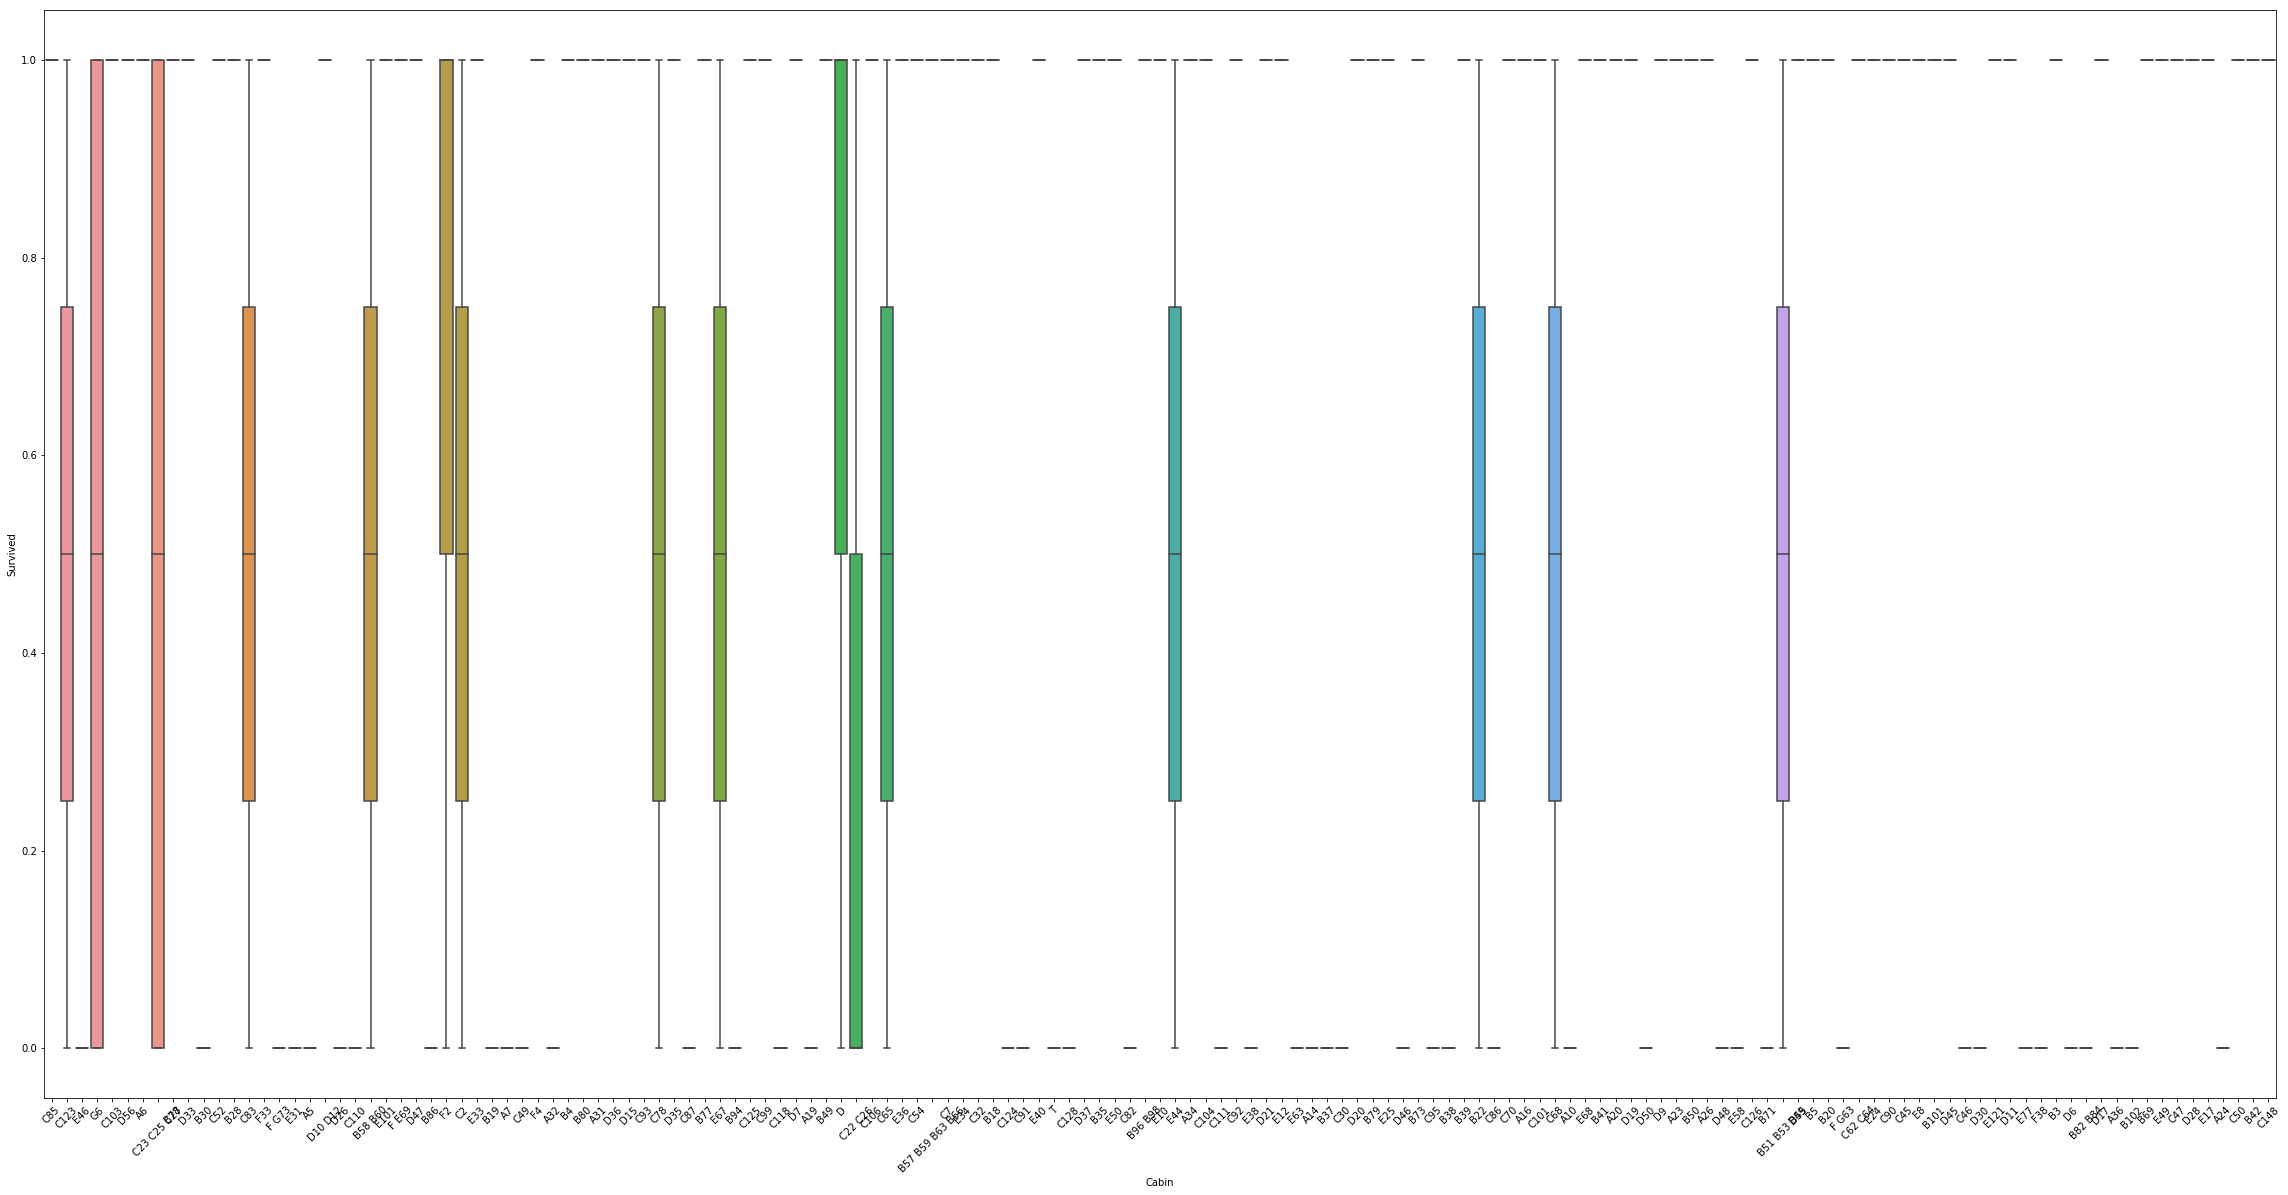

In [9]:
plt.figure(figsize = (40, 20))
sns.boxplot(x = 'Cabin', y = 'Survived',  data = load_train)
xt = plt.xticks(rotation=45)

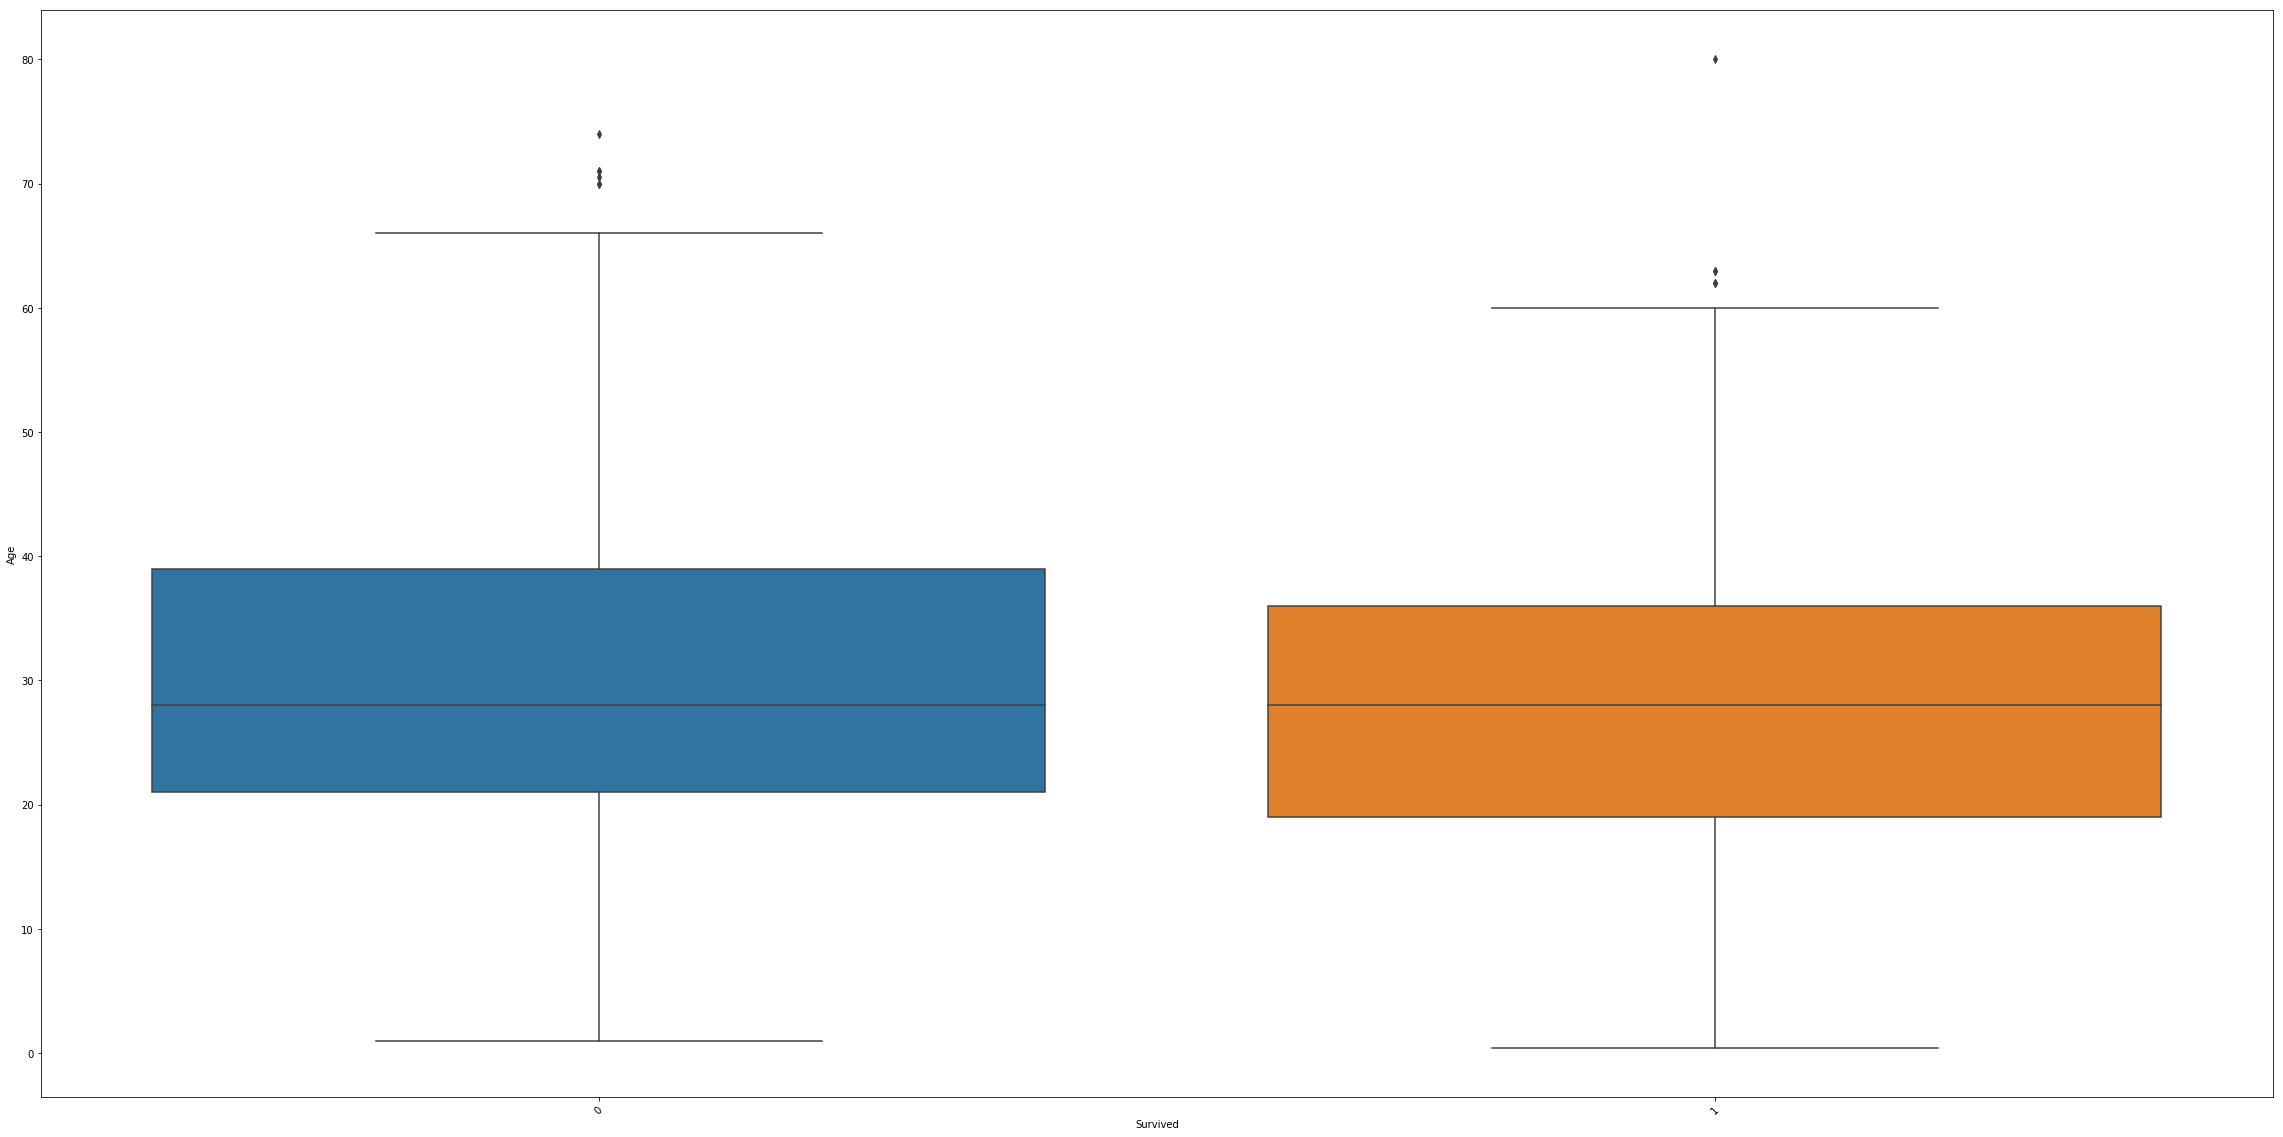

In [10]:
plt.figure(figsize = (40, 20))
sns.boxplot(x = 'Survived', y = 'Age',  data = load_train)
xt = plt.xticks(rotation=45)

Embark = 승선항, describe()결과 'S' 가 가장많고 결측치가 2개 뿐이여서 가장 많은 값으로 채움

In [11]:
load_train.Embarked.describe()
load_train.Embarked = load_train.Embarked.fillna('S')
load_train.Embarked.isnull().sum()
load_train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

이름의 경우 get_dummies 사용하면 동명이인 외에 다 다른값을 가짐<br></br>
따라서 Master, Miss, Mr, Mrs 로 나누고 one-hot encoding

In [12]:
for i in range(len(load_train.Name)):
    a =load_train.Name[i].split()
    if 'Mr.' in a :
        load_train.Name[i] = 'Mr.'
    elif 'Miss.' in a :
        load_train.Name[i] = 'Miss'
    elif 'Mrs.' in a :
        load_train.Name[i] = 'Mrs'
    elif 'Master.' in a :
        load_train.Name[i] = 'Master'
    else :
        load_train.Name[i] = 'nothing'
    


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on

In [13]:
load_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
load_train.Age = load_train.Age.fillna(load_train.Age.mean())

In [15]:
train_x = load_train.drop(['Ticket','PassengerId','Survived','Cabin'],axis=1)
train_y = load_train.Survived

In [16]:
train_x.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
train_x = pd.get_dummies(train_x)
print(len(train_x))
train_x.head()

891


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Master,Name_Miss,Name_Mr.,Name_Mrs,Name_nothing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,0,1,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

train_x = train_x[:int(len(train_x)*0.8)]
test_x = train_x[int(len(train_x)*0.8):]

train_y = train_y[:int(len(train_y)*0.8)]
test_y = train_y[int(len(train_y)*0.8):]

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
clf1 = LogisticRegression(penalty='l2',C=0.001,random_state=0)
clf2 = DecisionTreeClassifier(max_depth=1,criterion='entropy',random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
clf4 = MLPClassifier(hidden_layer_sizes=(500,),learning_rate_init=0.002,alpha=0.01,max_iter=500)
clf5 = RandomForestClassifier(n_jobs=-1)
clf6 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)


pipe1 = Pipeline([['sc',MinMaxScaler()],['clf',clf1]])
pipe3 = Pipeline([['sc',MinMaxScaler()],['clf',clf3]])
pipe4 = Pipeline([['sc',MinMaxScaler()],['clf',clf4]])


clf_label=['Logistic Regression','Decision Tree','KNN','MLPClassifier','RandomForest','Adaboost']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1,clf2,pipe3,pipe4,clf5,clf6],clf_label):
    scores =cross_val_score(estimator=clf,
                           X=train_x,
                           y=train_y,
                           cv=10,
                           scoring='roc_auc')
    print("ROC AUC : %0.2f (+/- %0.2f) [%s]\n"%(scores.mean(),scores.std(),label))
        
    
eclf1 = VotingClassifier(estimators=[('lr', pipe1), ('rf', clf2), ('gnb', pipe3),('nlp',pipe4),('rd',clf5),('ada',clf6)], 
                         voting='soft',n_jobs=-1)    
eclf1 = eclf1.fit(train_x, train_y)

print('Ensenble 10-fold cross validation:\n')
scores =cross_val_score(estimator=eclf1,X=train_x, y=train_y,cv=10,scoring='roc_auc')
print("Ensemble AUC : %0.2f (+/- %0.2f) [%s]\n"%(scores.mean(),scores.std(),'Ensemble model'))
    
print(classification_report(test_y,eclf1.predict(test_x)))

10-fold cross validation:

ROC AUC : 0.85 (+/- 0.05) [Logistic Regression]

ROC AUC : 0.77 (+/- 0.06) [Decision Tree]

ROC AUC : 0.73 (+/- 0.06) [KNN]

ROC AUC : 0.86 (+/- 0.05) [MLPClassifier]

ROC AUC : 0.83 (+/- 0.07) [RandomForest]

ROC AUC : 0.85 (+/- 0.05) [Adaboost]

Ensenble 10-fold cross validation:

Ensemble AUC : 0.85 (+/- 0.05) [Ensemble model]

             precision    recall  f1-score   support

          0       0.91      1.00      0.95        86
          1       1.00      0.84      0.91        57

avg / total       0.94      0.94      0.94       143



In [21]:
#test data
load_csv = pd.read_csv('test.csv')
load_csv.head()
load_csv.Pclass = load_csv.Pclass.astype(str)

In [22]:
load_csv.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
load_csv.Age = load_csv.Age.fillna(load_csv.Age.mean())

In [24]:
load_csv.Fare = load_csv.Fare.fillna(load_csv.Fare.mean())

In [25]:
for i in range(len(load_csv.Name)):
    a =load_csv.Name[i].split()
    if 'Mr.' in a :
        load_csv.Name[i] = 'Mr.'
    elif 'Miss.' in a :
        load_csv.Name[i] = 'Miss'
    elif 'Mrs.' in a :
        load_csv.Name[i] = 'Mrs'
    elif 'Master.' in a :
        load_csv.Name[i] = 'Master'
    else :
        load_csv.Name[i] = 'nothing'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on

In [26]:
ID = load_csv.PassengerId

In [27]:
test_set = load_csv.drop(['PassengerId','Cabin','Ticket'],axis=1)

In [28]:
test_set.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr.,male,34.5,0,0,7.8292,Q
1,3,Mrs,female,47.0,1,0,7.0000,S
2,2,Mr.,male,62.0,0,0,9.6875,Q
3,3,Mr.,male,27.0,0,0,8.6625,S
4,3,Mrs,female,22.0,1,1,12.2875,S
5,3,Mr.,male,14.0,0,0,9.2250,S
6,3,Miss,female,30.0,0,0,7.6292,Q
7,2,Mr.,male,26.0,1,1,29.0000,S
8,3,Mrs,female,18.0,0,0,7.2292,C
9,3,Mr.,male,21.0,2,0,24.1500,S


In [29]:
test_set = pd.get_dummies(test_set)
test_set = min_max_scaler.fit_transform(test_set)

In [30]:
predict = eclf1.predict(test_set)

In [31]:
test = pd.DataFrame( { 'PassengerId': ID , 'Survived': predict } )
test.shape
test.head()
test.to_csv( 'titanic_pred9.csv' , index = False )